# Boston Housing Data Analysis
This project used the SKLearn example data set of Boston Housing tracts. Using this data, I analyzed the effect of Pupil to Teacher ratio and bordering Charles River had on the median house price in each land tract. 

The third section is a discussion of how large an effect you could see if we added Subway stations to each tract, assuming they did not already exist. 


Description of the data is here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load in Boston Housing Data
from sklearn.datasets import load_boston
data = load_boston()

In [4]:
# Covert into DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Analyzing PTRATIO
# PTRATIO - pupil-teacher ratio by town

# Mean and Standard Devation
mean = df['PTRATIO'].mean()
stdev = df['PTRATIO'].std()
print('Mean of PTRATIO: ', mean)
print('Standard Devation of PTRATIO: ', stdev)

Mean of PTRATIO:  18.455533596837967
Standard Devation of PTRATIO:  2.164945523714446


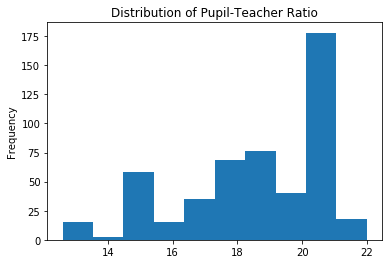

In [6]:
# Histogram of PTRATIO
df['PTRATIO'].plot(kind='hist', title="Distribution of Pupil-Teacher Ratio")

In [7]:
# Correlation between PTRATIO and MEDV
df['PTRATIO'].corr(df['MEDV'])

# Negative correlation - so more expensive houses mean lower pupil to teacher ratio
# Makes sense because "better" schools have smaller class size
# Large correlation is > 0.5

-0.5077866855375616

/Users/anniesiddle/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Median Housing Price vs. Pupil-Teacher Ratio')

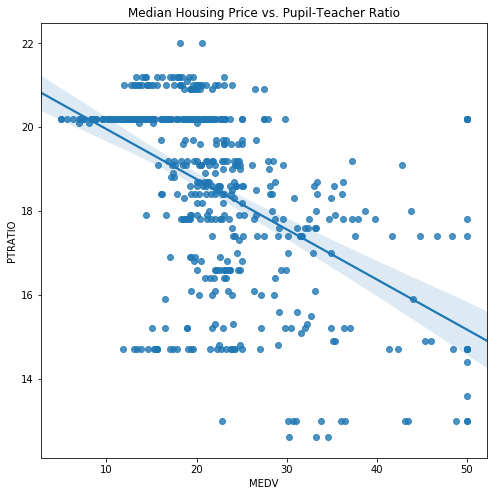

In [56]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="MEDV", y="PTRATIO", data=df, ax = ax)
plt.title('Median Housing Price vs. Pupil-Teacher Ratio')

In [ ]:
""" You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target)
than those that do not.

What is the null hypothesis?
    The null hypothesis is that the median house price is the same for tracts that do and do not border the river.
"""

In [28]:
# Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.
# What is the 90% confidence interval for the target (price) of tracts that border the Charles River?
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.05):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('P-value is %4.3f' % t_stat[1])
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))    

river_houses = df[df['CHAS'] == 1]
population_mean = df['MEDV'].mean()
print("Mean of the population is = %4.3f" % population_mean) 
    
t_one_sample(river_houses['MEDV'], mu=population_mean)


Mean of the population is = 22.533
P-value is 0.006
Confidence Intervals for alpha =0.05
Lower =  28.409 Upper = 28.471


In [26]:
# Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary? 
from statsmodels.stats.power import tt_ind_solve_power
size = tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.05, power=.8, ratio=1, alternative='two-sided')
print('To see an effect size of 0.6 with 80% power, you would need {} in each group.'.format(round(size)))

To see an effect size of 0.6 with 80% power, you would need 45 in each group.


In [ ]:
"""
Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. 
Be creative with your new “features” – we use the term loosely. You can assume that none of the tracts contained 
your features previously. Design an experiment to explore the effects of these features on the media house price 
in census tracts. You should include an explanation of the experimental design as well as a plan of analysis, 
which should include a discussion of group size and power. Be sure to apply the knowledge you learned in the 
Data Science Research Methods courses.
"""

In [42]:
# Looking at median house price when tracts have Public Transportation (a metro stop)

# New public transportation is a large investment,
# so I want to see what effect I can see with small numbers of stations and keep at least 80% power.

samples_sizes = [x for x in range(10,101,10)] + [128]

effects = [tt_ind_solve_power(effect_size=None, nobs1 = x, alpha=0.05, power=0.8, ratio=1, alternative='two-sided') 
                    for x in samples_sizes]
d_effects = pd.DataFrame({'Sample Size':samples_sizes, 'Effect':effects})
d_effects

# 128 is the actual number of stations in Boston

,Effect,Sample Size
0,1.324947,10
1,0.909129,20
2,0.735620,30
3,0.634299,40
4,0.565880,50
5,0.515707,60
6,0.476882,70
7,0.445684,80
8,0.419905,90
9,0.398139,100
